# Exercise 09.1

We want to optimize the traveling salesman problem via a genetic algorithm (GA). So let's define the main ingredients of the game:
- **Map**: at the beginning of the simulation we define a map of $n$ cities with positions $\{\mathbf c_i\}$. The salesman will travel among these cities.
- **Organisms**: in every biological evolution there is a fight for survival among different organisms. Here the fight takes place among the possible paths the salesman can do. We will start our simulation with a big population of these strange organisms, and will let them fight and reproduce in order to have the best in the end. Every organism is represented by a sequence of cities *i.e.* by a vector containing a permutation of $n$.
- **Fitness**: in the african savannah the fittest organisms that will survive and reproduce are the strongest ones *e.g.* lions or tigers. Here the fittest organisms are the shortest path: we want them to survive and give rise to new generations. The fitness is quantified by the cost function $
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$
- **Evolution rules**: nature uses *mutations* to be ergodic and *natural selection* to conserve the best genetic material. The fittest organisms tend to survive and to reproduce propagating their genetic heritage to future generations.

Let's consider my specific genetic algorithm. I developed a object-oriented code based on two main classes:

1. **class Chromosome**: a chromosome represents a single possible path of the salesman. It is essentialy a vector which contains a possible permutation of $n$ elements. It contains also all the information to perform a mutation.
    
2. **class Map**: each city is labeled by a number $j \in [0,n-1]$. The map contains the coordinates $(x,y)$ of each city, so that each label has a counterpart in the "real" world. The cities can be randomly placed along a circumference of fixed radius or inside a square of fixed side. The map is also able to compute the square distance of any pair of cities.

I implemented 5 possible mutations:
- **PairPermutation**: it chooses randomly two cities of the path and swaps them.
- **Shift**: it chooses randomly a number in $[0,n-1]$ and makes a $+n$ shift of each city in the path. This mutation is useful for ergodicity but doesn't change the fitness of the organism.
- **RigidShift**: shift of $+n$ positions for $m$ contiguous cities.
- **SwapRange**: swap of two non intersecting ranges of $m$ contiguous cities.
- **Reverse**: it chooses $m$ contiguous cities and reverses the order.

Each one of these mutations can happen with fixed probability ($=0.1$ in our case) every time a new organism is generated.

We have some other important functions:
- **Selection**: each path of the population can be chosen with probability $p(i)=\big(\frac{1}{fitness(i)}\big)^2$. A path with high fitness will be rarely chosen, while a path with low fitness will be easily selected.
- **Crossover**: this is of essential importance in order to create a new generation of organisms. Once we have selected two parents with the previous function, we have to generate two sons which inherit some information from the parents. This is done in three steps. (1) We cut the mum and dad paths at the same position, (2) we conserve the first part of the paths and (3) we complete the paths with the missing cities adding them in the order in which they appear in the consort. The sons will have a mixed genetic heritage: if we are lucky they can take the best from both the parents and be better than mum and dad!! 

Once we select two possible parents, a crossover takes place with $50\%$ probability.

We applied our code to the optimization of a path among 

- 30 cities randomly placed **on** a circumference
- 30 cities randomly placed **inside** a square

We simulated $1000$ generations of a $100$ organisms population.

In both cases we show:
- a picture of the best path length and of the path length, averaged on the best half of the population, as a function of the generations
- a picture of the best path

### Cities on a circumference with $r=1$

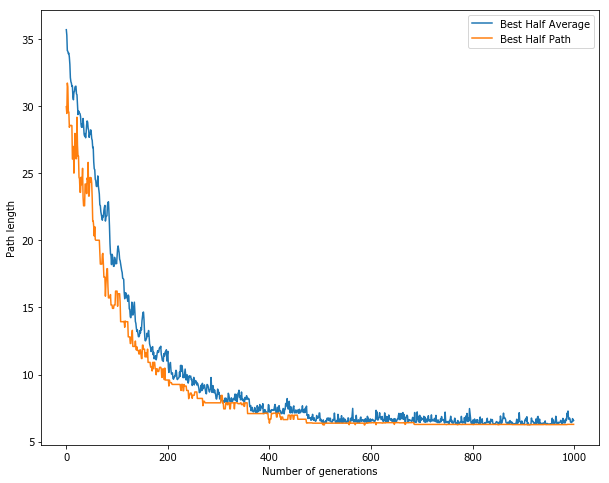

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

igen, best_half, best = np.loadtxt("Ex_09.1/Figures/Circ_BestPath.txt", usecols=(0,1,2), delimiter='\t', unpack='true')  

plt.figure(figsize=(10,8))
plt.plot(igen, best_half, label='Best Half Average')
plt.plot(igen, best, label='Best Half Path')
plt.xlabel('Number of generations')
plt.ylabel('Path length')

plt.legend()
plt.show()

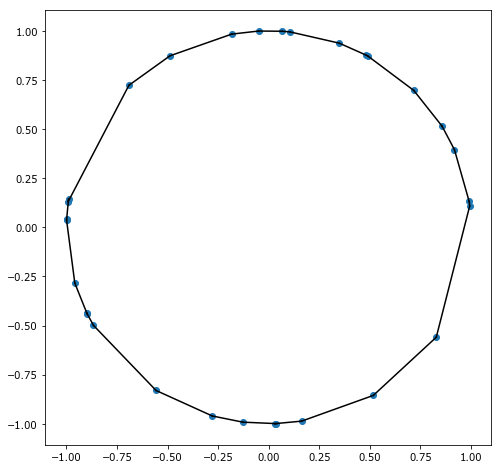

In [12]:
def connectpoints(x1,y1,x2,y2):
    plt.plot([x1,x2],[y1,y2],'k-')

a, b =np.loadtxt("Ex_09.1/Figures/Circ_AdjList.txt", dtype=int, usecols=(0,1), delimiter='\t', unpack='true')
x, y = np.loadtxt("Ex_09.1/Figures/Circ_Map.txt", usecols=(1,2), delimiter='\t', unpack='true')  # compute graph layout

plt.figure(figsize=(8,8))
plt.scatter(x,y)


for i in range(len(a)):
    tmp1=a[i]
    tmp2=b[i]
    connectpoints(x[tmp1],y[tmp1],x[tmp2],y[tmp2])

plt.show()


### Cities inside a square with $L=1$

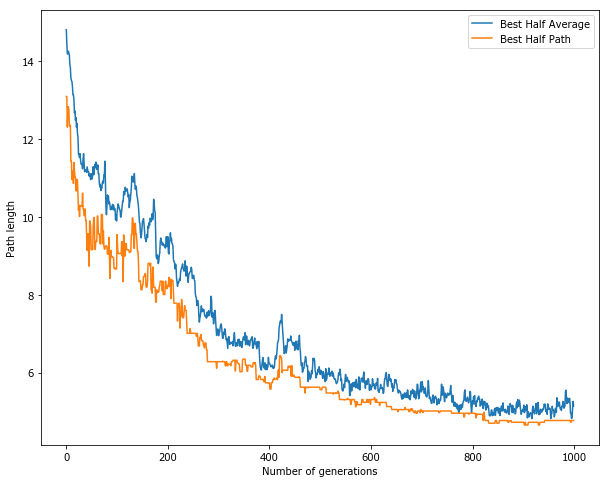

In [23]:
igen, best_half, best = np.loadtxt("Ex_09.1/Figures/Sq_BestPath.txt", usecols=(0,1,2), delimiter='\t', unpack='true')  

plt.figure(figsize=(10,8))
plt.plot(igen, best_half, label='Best Half Average')
plt.plot(igen, best, label='Best Half Path')
plt.xlabel('Number of generations')
plt.ylabel('Path length')

plt.legend()
plt.show()

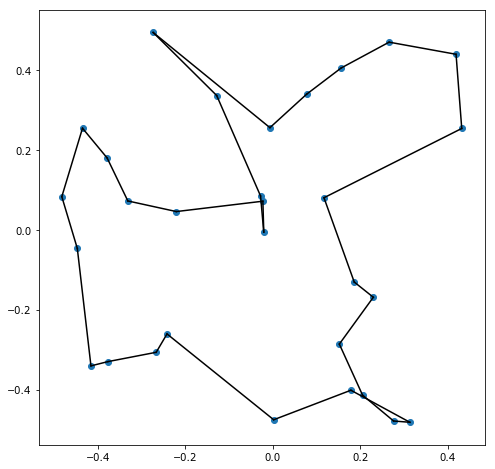

In [24]:
a, b =np.loadtxt("Ex_09.1/Figures/Sq_AdjList.txt", dtype=int, usecols=(0,1), delimiter='\t', unpack='true')
x, y = np.loadtxt("Ex_09.1/Figures/Sq_Map.txt", usecols=(1,2), delimiter='\t', unpack='true')  # compute graph layout

plt.figure(figsize=(8,8))
plt.scatter(x,y)


for i in range(len(a)):
    tmp1=a[i]
    tmp2=b[i]
    connectpoints(x[tmp1],y[tmp1],x[tmp2],y[tmp2])

plt.show()

